<class 'numpy.ndarray'>


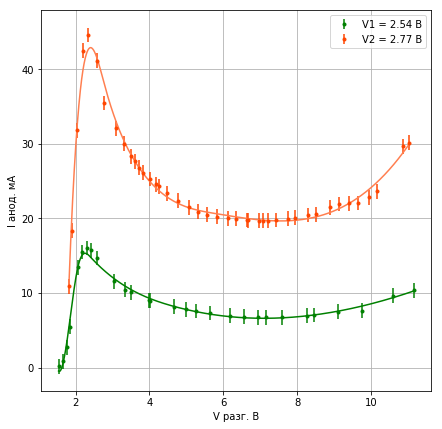

In [12]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from math import* 
import warnings
warnings.filterwarnings('ignore')

# Парсинг данных.
data = pd.read_table('measurements.txt', sep = '\s+' )
data2 = pd.read_table('measurements2.txt', sep = '\s+' )
I = data['I(B)']
errIk1 = [1]*29
errIk2 = [1]*42
V = data['V(B)']
I2 = data2['I(B)']
V2 = data2['V(B)']

xlist1 = mlab.frange(V[0],V[28],0.005)
tck1 = interpolate.splrep(V, I, s=7, k = 3) 
yder1 = interpolate.splev(xlist1, tck1, der=0) 


xlist2 = mlab.frange(V2[0],V2[41],0.005)
tck2 = interpolate.splrep(V2, I2, s=30 , k = 3) 
yder2 = interpolate.splev(xlist2, tck2, der=0) 


print(type(yder2))

#Часть 1
'''
Расстояния между максимумами и между минимумами 
накал 2.77 В - 4.2 B расстояние
накал 2.54 В - 4.0 B расстояние
'''

#Часть 2

#Визуализация.
plt.figure(figsize= (7,7)) 
plt.errorbar(V, I, yerr = errIk1, fmt='.',label='V1 = 2.54 B', color = 'green')  
plt.errorbar(V2, I2, yerr = errIk2, fmt='.',label='V2 = 2.77 B', color = 'orangered') 
plt.xlabel("V разг. В")
plt.ylabel("I анод. мА")
plt.plot(xlist1,yder1,color = "green")
plt.plot(xlist2,yder2,color = 'coral')
plt.grid()
plt.legend();



1.0
1.0


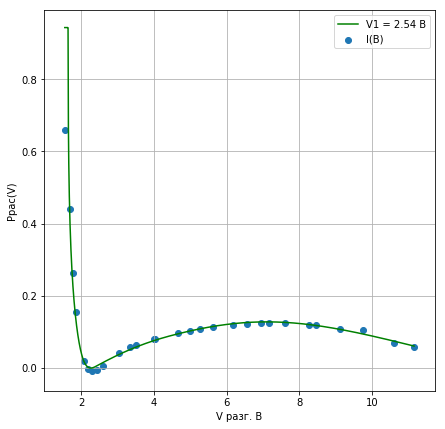

In [13]:
p1 = yder1.copy()
p2 = yder2.copy()

e1 = I.copy()
e2 = I2.copy()

for i in range(e1.size):
    elem = I[i]   
    e1[i] =(-1*log(elem)+2.73)/6.58

for i in range(p1.size):
    elem = 0.031 #0.072
    if yder1[i]>0:
        elem = yder1[i]   
    p1[i] =(-1*log(elem)+2.73)/6.58
   
    
for i in range(p2.size):
    elem = fabs(yder2[i])   
    p2[i] =(-1*log(elem)+3.76)/5.41
    
    
for i in range(e2.size):
    elem = fabs(I2[i])   
    e2[i] =(-1*log(elem)+3.76)/5.41    
    
integral1 = 0
integral2 = 0

for i in range(p1.size):
    integral1 += p1[i]*0.005
    
for i in range(p2.size):
    integral2 += p2[i]*0.005    

print(integral1.round())
print(integral2.round())
    
plt.figure(figsize= (7,7)) 
plt.plot(xlist1,p1,color = "green",label='V1 = 2.54 B')
plt.scatter(V,e1)
plt.xlabel("V разг. В")
plt.ylabel("Pрас(V)")
plt.grid()
plt.legend();    

<Figure size 504x504 with 0 Axes>

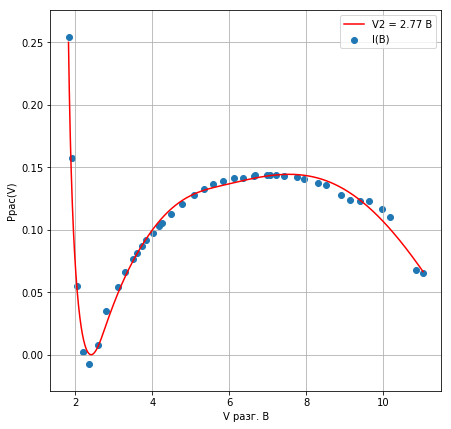

In [14]:
plt.figure(figsize= (7,7))
plt.figure(figsize= (7,7)) 
plt.scatter(V2,e2)
plt.plot(xlist2,p2,color = "red",label='V2 = 2.77 B')
plt.xlabel("V разг. В")
plt.ylabel("Pрас(V)")
plt.grid()
plt.legend(); 